In [18]:
# importação de bibliotecas

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from joblib import dump
# from google.colab import drive

In [2]:
# Carregar dataset

# drive.mount('/content/drive')

# Caminho Felipe
# path = '/content/drive/MyDrive/Faculdade/IA/RedeNeuralArtificial/stats.csv'

# Caminho Lucas
# path = '/content/drive/MyDrive/Faculdade/IA/RNA/stats.csv'

path = 'stats.csv'

df = pd.read_csv(path, sep=",")

In [3]:
# Verificar alguns dados estatísticos
print(df.describe())

             height        weight         speed      strength     dexterity  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      59.566700    145.267400     28.324500     12.850800     12.842500   
std       13.246007     70.109265      2.360245      2.967528      2.945872   
min       33.000000     36.000000     25.000000      3.000000      3.000000   
25%       52.000000    120.000000     25.000000     11.000000     11.000000   
50%       64.000000    155.000000     30.000000     13.000000     13.000000   
75%       69.000000    188.000000     30.000000     15.000000     15.000000   
max       82.000000    360.000000     30.000000     20.000000     20.000000   

       constitution  intelligence        wisdom      charisma  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean      12.752300     12.751500     12.414800     12.870100  
std        2.922293      2.945677      2.893817      2.974746  
min        3.000000      3.00000

In [4]:
# Carregar váriáveis dependentes e independentes
x = df.drop('race', axis=1)
y = df['race']

In [5]:
# Pré-processamento: remoção de outliers

indexes = []
for column in x.columns:
    z_scores = stats.zscore(x[column])
    outliers = abs(z_scores) > 3  # Normalmente, um Z-Score acima de 3 é considerado outlier.
    indexes += list(df[outliers].index)

new_df = df.drop(index=indexes)

x=new_df.drop('race',axis=1)
y=new_df['race']

In [6]:
# Verificar se as classes estão balanceadas
new_df['race'].value_counts()

race
dragonborn    1143
halfling      1121
human         1119
tiefling      1113
gnome         1111
elf           1106
dwarf         1090
half.elf      1082
half.orc      1063
Name: count, dtype: int64

In [7]:
# Separação de dados de treino e teste

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
#Padronizar os dados
scaler = StandardScaler()#Scaler, transfoma conjunto de maneira que fique média = 0 e desvio padrão = 1
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Testando algumas configurações com número mínimo, médio e máximo de neurônios na camada oculta


In [9]:
# Número mínimo: 9

mlp=MLPClassifier(hidden_layer_sizes=(9,), max_iter=10000, random_state=42)

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

#Avaliar a precisão
accuracy = accuracy_score(y_test, y_pred)#cata o valor do y_teste e compara com a previsão da rede neural
print(f'Accuracy: {accuracy *100:.2f}%')

Accuracy: 65.59%


In [10]:
# Número médio: 15


mlp=MLPClassifier(hidden_layer_sizes=(15,), max_iter=10000, random_state=42)

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

#Avaliar a precisão
accuracy = accuracy_score(y_test, y_pred)#cata o valor do y_teste e compara com a previsão da rede neural
print(f'Accuracy: {accuracy *100:.2f}%')

Accuracy: 64.96%


In [11]:
# Número máximo: 18

mlp=MLPClassifier(hidden_layer_sizes=(18,), max_iter=10000, random_state=42)

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

#Avaliar a precisão
accuracy = accuracy_score(y_test, y_pred)#cata o valor do y_teste e compara com a previsão da rede neural
print(f'Accuracy: {accuracy *100:.2f}%')

Accuracy: 65.23%


In [20]:
# salvando dados pré-processados
filename = 'LucasSantos_FelipeSella_pre_processed_data.csv'
new_df.to_csv(filename, index=False)

Concluiu-se que o número mínimo deu melhores resultados, logo este foi utilizado para busca por melhores hiperparâmetros.

In [14]:
# Busca por melhores hiperparâmetros

param_grid = {
    'hidden_layer_sizes': [(9,), (5, 4), (3, 3, 3)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.1, 0.001, 0.0001],
    'learning_rate': ['constant', 'adaptive'],
}


grid_search = GridSearchCV(MLPClassifier(max_iter=10000, random_state=42), param_grid, n_jobs=-1, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.1, 0.001, 0.0001],
                         'hidden_layer_sizes': [(9,), (5, 4), (3, 3, 3)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [15]:
print(f"Melhores hiperparâmetros encontrados: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

#Avaliar a precisão
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia * 100:.2f}%')

Melhores hiperparâmetros encontrados: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (9,), 'learning_rate': 'constant', 'solver': 'adam'}
              precision    recall  f1-score   support

  dragonborn       0.72      0.87      0.79       365
       dwarf       1.00      1.00      1.00       338
         elf       0.47      0.57      0.52       329
       gnome       0.88      0.90      0.89       332
    half.elf       0.39      0.23      0.29       323
    half.orc       0.69      0.71      0.70       313
    halfling       0.89      0.88      0.89       317
       human       0.39      0.37      0.38       342
    tiefling       0.38      0.38      0.38       326

    accuracy                           0.66      2985
   macro avg       0.65      0.66      0.65      2985
weighted avg       0.65      0.66      0.65      2985

Acurácia: 65.83%


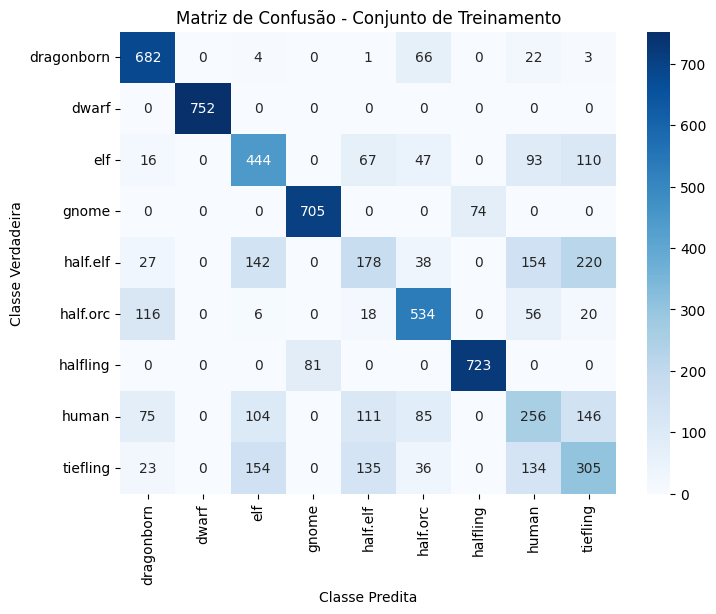

In [16]:
y_train_pred = mlp.predict(x_train)

#Gerar a matriz de confusão para o conjunto de treinamento
cm_train = confusion_matrix(y_train, y_train_pred)

#Plotar a matriz de confusão para o conjunto de treinamento
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=df['race'].unique(), yticklabels=df['race'].unique())
plt.title('Matriz de Confusão - Conjunto de Treinamento')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

In [19]:
# Salvar o modelo

dump(mlp, 'model.joblib')

['model.joblib']